In [3]:
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import json
from collections import defaultdict
import random
import matplotlib.pyplot as plt

from sklearn import preprocessing 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



In [ ]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading the data

In [ ]:
import json
train = json.load(open('drive/My Drive/CGAS/train.json'))

In [ ]:
train_df = pd.DataFrame.from_dict(train)

In [ ]:
train_df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


Checking for duplicate Recipes

In [ ]:
#Remove Duplicates  rows
# print(len(df))
print("No of rows before removing duplicate rows",len(train_df))
print(train_df.loc[train_df.astype(str).drop_duplicates().index])

print("No of rows after removing duplicate rows",len(train_df))

No of rows before removing duplicate rows 39774
          id      cuisine                                        ingredients
0      10259        greek  [romaine lettuce, black olives, grape tomatoes...
1      25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2      20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3      22213       indian                [water, vegetable oil, wheat, salt]
4      13162       indian  [black pepper, shallots, cornflour, cayenne pe...
...      ...          ...                                                ...
39769  29109        irish  [light brown sugar, granulated sugar, butter, ...
39770  11462      italian  [KRAFT Zesty Italian Dressing, purple onion, b...
39771   2238        irish  [eggs, citrus fruit, raisins, sourdough starte...
39772  41882      chinese  [boneless chicken skinless thigh, minced garli...
39773   2362      mexican  [green chile, jalapeno chilies, onions, ground...

[39774 rows x 3 columns]
No

Checking for NAN values

In [ ]:
kf = train_df.dropna(how = 'all')
print(train_df.shape," ",kf.shape)

(39774, 3)   (39774, 3)


In [ ]:
#analysis2
#find percentage of null values 
df_missing=train_df.isna()
df_count_missing=df_missing.sum()
per_none_value=df_count_missing/len(df_count_missing)
per_none_value.sort_values(ascending=False,inplace=True)
print("% of null values in each column")
print(per_none_value)

% of null values in each column
ingredients    0.0
cuisine        0.0
id             0.0
dtype: float64


Number of Recipes vs cuisine graph

{'southern_us', 'spanish', 'french', 'filipino', 'cajun_creole', 'italian', 'jamaican', 'mexican', 'thai', 'japanese', 'moroccan', 'irish', 'korean', 'vietnamese', 'chinese', 'brazilian', 'russian', 'british', 'greek', 'indian'}


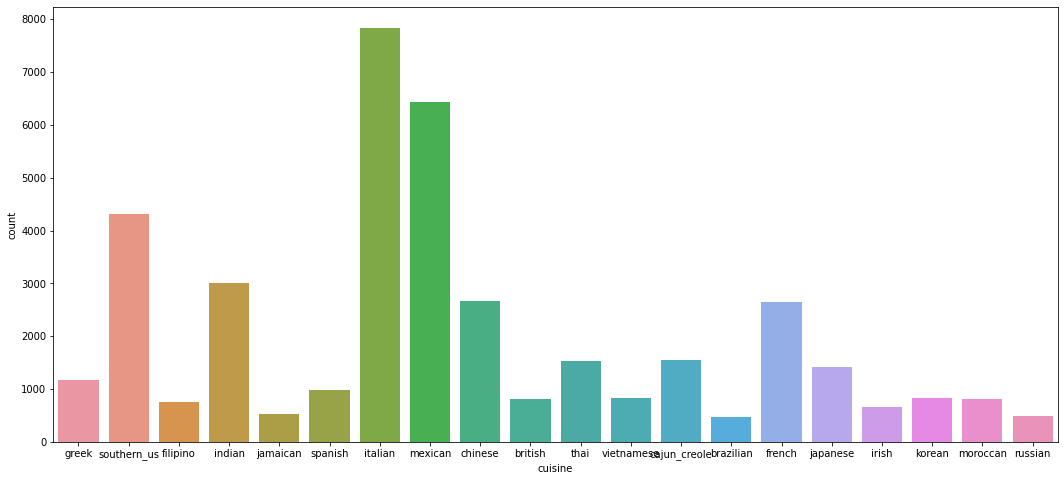

In [ ]:
# plotting figure number of recipe vs cuisine
train_df.groupby('cuisine').size()
print(set(train_df['cuisine']))
from scipy.stats import norm 
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,8))
sns.countplot(x='cuisine', data=train_df)

In [ ]:
text_data = [" ".join(data['ingredients']) for data in train]

In [ ]:
text_data

['romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans feta cheese crumbles',
 'plain flour ground pepper salt tomatoes ground black pepper thyme eggs green tomatoes yellow corn meal milk vegetable oil',
 'eggs pepper salt mayonaise cooking oil green chilies grilled chicken breasts garlic powder yellow onion soy sauce butter chicken livers',
 'water vegetable oil wheat salt',
 'black pepper shallots cornflour cayenne pepper onions garlic paste milk butter salt lemon juice water chili powder passata oil ground cumin boneless chicken skinless thigh garam masala double cream natural yogurt bay leaf',
 'plain flour sugar butter eggs fresh ginger root salt ground cinnamon milk vanilla extract ground ginger powdered sugar baking powder',
 'olive oil salt medium shrimp pepper garlic chopped cilantro jalapeno chilies flat leaf parsley skirt steak white vinegar sea salt bay leaf chorizo sausage',
 'sugar pistachio nuts white almond bark flour vanilla e

In [ ]:
cuisine=[]
for data in train:
  cuisine.append(data['cuisine'])

In [ ]:
cuisine

['greek',
 'southern_us',
 'filipino',
 'indian',
 'indian',
 'jamaican',
 'spanish',
 'italian',
 'mexican',
 'italian',
 'italian',
 'chinese',
 'italian',
 'mexican',
 'italian',
 'indian',
 'british',
 'italian',
 'thai',
 'vietnamese',
 'thai',
 'mexican',
 'southern_us',
 'chinese',
 'italian',
 'chinese',
 'cajun_creole',
 'italian',
 'chinese',
 'mexican',
 'italian',
 'cajun_creole',
 'mexican',
 'thai',
 'italian',
 'cajun_creole',
 'italian',
 'filipino',
 'southern_us',
 'southern_us',
 'italian',
 'brazilian',
 'mexican',
 'indian',
 'mexican',
 'chinese',
 'french',
 'southern_us',
 'southern_us',
 'southern_us',
 'japanese',
 'southern_us',
 'italian',
 'southern_us',
 'italian',
 'jamaican',
 'japanese',
 'indian',
 'italian',
 'irish',
 'thai',
 'thai',
 'indian',
 'jamaican',
 'italian',
 'thai',
 'korean',
 'french',
 'french',
 'southern_us',
 'spanish',
 'indian',
 'moroccan',
 'italian',
 'italian',
 'moroccan',
 'moroccan',
 'vietnamese',
 'japanese',
 'mexican',

Data is preprocessed

In [ ]:

j=0
for i in text_data:
    txt = i.lower().split(" ")
    txt = [re.sub("\s+", "-", t) for t in txt]
    txt = [re.sub("[^a-zA-Z\s+]", "", t) for t in txt]
    txt = [t.strip() for t in txt if t.strip()!=""]
    text_data[j] = " ".join(txt)
    j+=1

Label Encoding for Y.

In [ ]:
from sklearn import preprocessing
LabelEncoder = preprocessing.LabelEncoder()
LabelEncoder.fit(cuisine)
Y=LabelEncoder.transform(cuisine) 

In [ ]:
prediction_decoded = LabelEncoder.inverse_transform(Y)
print(prediction_decoded)

['greek' 'southern_us' 'filipino' ... 'irish' 'chinese' 'mexican']


Test Train Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(text_data, Y, test_size=0.2)

TFIDF VECTORIZER-- FEATURE EXTRACTION

In [ ]:
Vectorizer = TfidfVectorizer()
Vectorizer.fit(X_train)
X_train_Vectorizer = Vectorizer.transform(X_train)
X_test_Vectorizer = Vectorizer.transform(X_test)


Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(multi_class='multinomial')
model.fit(X_train_Vectorizer, y_train)
y_pred=model.predict(X_test_Vectorizer)
print(accuracy_score(y_test, y_pred))


0.781269641734758


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)

In [ ]:
neigh.fit(X_train_Vectorizer, y_train)
y_pred2=neigh.predict(X_test_Vectorizer)
print(accuracy_score(y_test, y_pred2))

0.735512256442489


In [ ]:
from tqdm import tqdm

Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
pred=[]
for i in tqdm(X_test_Vectorizer):
    cosineSimilarities = cosine_similarity(i, X_train_Vectorizer).flatten()
    cosineSimilarities=cosineSimilarities.tolist()
    a=cosineSimilarities.index(max(cosineSimilarities))
    label=y_train[a]
    pred.append(label)
 

7955it [01:41, 78.05it/s]


In [ ]:
print(accuracy_score(y_test, pred))

0.6926461345065996


Decision Tree

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
decision_tree = tree.DecisionTreeClassifier(criterion = "gini")
decision_tree.fit(X_train_Vectorizer,y_train)
y_test_pred = decision_tree.predict(X_test_Vectorizer)
test_decision_accuracy_is=metrics.accuracy_score(y_test,y_test_pred)
# decision_tree_score_is = cross_val_score(estimator=decision_tree, X=X_train, y=Y_train, cv=5)
# depth_of_tree_x.append(depthis)
# accuracy_of_tree_y.append(decision_tree_score_is.mean())
# classification_data_en.columns
test_decision_accuracy_is

0.6087994971715902

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
rf_clf = RandomForestClassifier(n_estimators = 100)   
rf_clf.fit(X_train_Vectorizer, y_train) 
rf_clf_y_pred = rf_clf.predict(X_test_Vectorizer) 
rf_clf_accuracy=metrics.accuracy_score(y_test,rf_clf_y_pred)
rf_clf_accuracy

0.7406662476429918

In [5]:
with open (r'C:\Users\acer\Desktop\Era\IIIT_DELHI\SEM3\CGAS\project\cuisine\whats-cooking\train.json\train.json') as jsonfile:
    train=json.load(jsonfile)

    
    

In [6]:
# technique 2 for prediction using ingredient presence
# finding frequency of ingredients in each cuisine
ingred_freq={}

for i in train:
    for j in i['ingredients']:
       
        if j in ingred_freq:
            ingred_freq[j]=ingred_freq[j]+1
        else:
            ingred_freq[j]=1
            
for i in ingred_freq:
    ingred_freq[i]=((ingred_freq[i]/len(train)))
    
ingred_freq=dict(sorted(ingred_freq.items(),key=lambda x:x[1],reverse=True))
ingred_freq



{'salt': 0.45378890732639415,
 'onions': 0.2004324433046714,
 'olive oil': 0.2004324433046714,
 'water': 0.18748428621712676,
 'garlic': 0.18554834816714436,
 'sugar': 0.16176396641021773,
 'garlic cloves': 0.15681098204857444,
 'butter': 0.1218886709910997,
 'ground black pepper': 0.12030472167747774,
 'all-purpose flour': 0.11645798763011012,
 'pepper': 0.11158042942625836,
 'vegetable oil': 0.11024790063860813,
 'eggs': 0.08518127419922562,
 'soy sauce': 0.08286820536028561,
 'kosher salt': 0.07826720973500277,
 'green onions': 0.07738723789410168,
 'tomatoes': 0.0768843968421582,
 'large eggs': 0.07411877105646905,
 'carrots': 0.07074973600844774,
 'unsalted butter': 0.06994519032533816,
 'ground cumin': 0.06906521848443707,
 'extra-virgin olive oil': 0.06906521848443707,
 'black pepper': 0.06604817217277618,
 'milk': 0.056896465027404836,
 'chili powder': 0.05118921908784633,
 'oil': 0.049529843616432846,
 'red bell pepper': 0.04875043998592045,
 'purple onion': 0.0476693317242419

In [7]:
# extracting all (6714) ingrdients to make columns of dataframe
c=1
col=[]

for j in ingred_freq:
   
    col.append(j)
    

col=sorted(col)
col.append("cuisine")
print("features",col)
print(len(col))

features ['(    oz.) tomato sauce', '(   oz.) tomato paste', '(10 oz.) frozen chopped spinach', '(10 oz.) frozen chopped spinach, thawed and squeezed dry', '(14 oz.) sweetened condensed milk', '(14.5 oz.) diced tomatoes', '(15 oz.) refried beans', '1% low-fat buttermilk', '1% low-fat chocolate milk', '1% low-fat cottage cheese', '1% low-fat milk', '2 1/2 to 3 lb. chicken, cut into serving pieces', '2% low fat cheddar chees', '2% low-fat cottage cheese', '2% lowfat greek yogurt', '2% milk shredded mozzarella cheese', '2% reduced-fat milk', '25% less sodium chicken broth', '33% less sodium cooked deli ham', '33% less sodium cooked ham', '33% less sodium ham', '33% less sodium smoked fully cooked ham', '40% less sodium taco seasoning', '40% less sodium taco seasoning mix', '7 Up', '8 ounc ziti pasta, cook and drain', '95% lean ground beef', 'A Taste of Thai Rice Noodles', 'Accent Seasoning', 'Adobo All Purpose Seasoning', 'Alaskan king crab legs', 'Alexia Waffle Fries', 'Alfredo sauce', '

In [8]:
# extracting unique ingredients in all 20 cuisines
cuisine_ingred={}
for i in train:
    for j in i['ingredients']:
        if i["cuisine"] not in cuisine_ingred:
            cuisine_ingred[i["cuisine"]]=[]
        else:
            if j not in cuisine_ingred[i["cuisine"]]:
                cuisine_ingred[i["cuisine"]].append(j)
for i in  cuisine_ingred:
    print(i,len( cuisine_ingred[i]))

greek 1198
southern_us 2462
filipino 947
indian 1664
jamaican 877
spanish 1263
italian 2929
mexican 2684
chinese 1792
british 1166
thai 1376
vietnamese 1108
cajun_creole 1576
brazilian 853
french 2102
japanese 1439
irish 999
korean 898
moroccan 974
russian 872


In [ ]:
# creating dataframe with above 6714 columns and 39774 rows and last column "cuisine" is also added hence making 6715 columns
'''
dataframe=[]
c=1
for i in train:
    
    row=[]
    for j in col:
        if j=="cuisine":
            break
        if j in cuisine_ingred[i["cuisine"]]:
            row.append(1)
        else:
            row.append(0)
        
    row.append(i["cuisine"])
    dataframe.append(row)
    c=c+1
    if c%1000==0:
        print(c)

df=pd.DataFrame(dataframe,columns=col)   
df
'''

In [10]:
# saving dataframe in file  
import pickle
'''
with open('df6714_prediction.pkl','wb') as f:
    pickle.dump(df, f)
'''  
# reading saved dataframe from file  
with open(r'C:\Users\acer\Desktop\Era\IIIT_DELHI\SEM3\CGAS\project\cuisine\whats-cooking\df6714_prediction.pkl','rb') as f:
    df2=pickle.load(f)
df2


,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms,cuisine
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,greek
1,0,0,0,0,0,0,0,1,1,1,...,0,0,0,1,1,0,0,1,0,southern_us
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,filipino
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,indian
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,irish
39770,1,1,1,0,0,1,0,1,0,1,...,0,0,1,1,1,1,1,1,1,italian
39771,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,irish
39772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,chinese


In [12]:

import pickle
'''
with open('df6714_prediction.pkl','wb') as f:
    pickle.dump(df, f)
'''   
with open(r'C:\Users\acer\Desktop\Era\IIIT_DELHI\SEM3\CGAS\project\cuisine\whats-cooking\df_prediction.pkl','rb') as f:
    df2=pickle.load(f)


In [13]:
#df3=df2.drop(df2.iloc[:,50:149],axis=1)

In [14]:
# dividing the dataframe into 20% test and 80% train data
x=df3.drop(["cuisine"],axis=1)
y=df3["cuisine"]
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)

In [15]:
# applying decison tree
DT = DecisionTreeClassifier()  
DT.fit(train_x, train_y)                    
pred_y = DT.predict(test_x)
print("Classification Accuracy \t:", accuracy_score(test_y,pred_y))

Classification Accuracy 	: 0.6921433060967944


In [16]:
# applying K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(train_x, train_y)
pred_y_knn=KNN.predict(test_x)
print("Classification Accuracy \t:", accuracy_score(test_y,pred_y_knn))

Classification Accuracy 	: 0.6022627278441232


In [17]:
#applying random forest
from sklearn.ensemble import RandomForestClassifier 
RF = RandomForestClassifier(n_estimators = 100)   
RF.fit(train_x, train_y) 
rf_clf_y_pred = RF.predict(test_x) 
print("Classification Accuracy \t:", accuracy_score(test_y,rf_clf_y_pred))


Classification Accuracy 	: 0.6921433060967944


In [18]:
# applying Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(multi_class='multinomial')
LR.fit(train_x, train_y)
y_pred=LR.predict(test_x)
print("Classification Accuracy \t:",accuracy_score(test_y, y_pred))

Classification Accuracy 	: 0.6921433060967944


c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
